In [226]:
import pandas as pd
import numpy as np

#using thomas evMutation
from model import CouplingsModel
import tools

%matplotlib inline
import matplotlib.pyplot as plt

from toolsPy3 import hamming

from scipy import stats

import seaborn as sns

/Users/davidd/anaconda/envs/evcouplings_env/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [267]:
#load in model file
c = CouplingsModel('/Users/davidd/DropboxLinks/DropboxHMS/parESingleLibrary/ex49_evh_stuff/orchestra/evc_kelly_develop_uniprot/e8/F7YBW7_e8_F7YBW8_e8.model')
c_e1 = CouplingsModel('/Users/davidd/DropboxLinks/DropboxHMS/parESingleLibrary/ex49_evh_stuff/orchestra/evc_kelly_develop_uniprot/e1/F7YBW7_e1_F7YBW8_e1.model')

c_old = CouplingsModel('/Users/davidd/DropboxLinks/DropboxHMS/parESingleLibrary/ex49_evh_stuff/orchestra/parED_may2017_e1/parED_e1_3_m80_f80.model')

,seq,conservation,inter,intra,fit
0,ALAL,-237.603375,-31.439403,-80.617306,-0.001478
1,ALAE,-236.936851,-31.011770,-80.474616,0.015735
2,ALAI,-236.993604,-31.163848,-79.424484,0.001563
3,ALAA,-236.722135,-31.982372,-81.130209,-0.001487
4,ALAV,-236.838358,-31.407984,-79.037703,0.001297
5,ALAM,-237.015378,-33.514560,-80.187969,0.000965
6,ALAF,-236.832281,-31.882477,-80.234574,-0.006309
7,ALAW,-236.295100,-31.564101,-78.417871,-0.008440
8,ALAK,-236.129707,-34.836219,-79.900137,0.067064
9,ALAR,-236.510516,-33.699322,-80.036217,-0.001127


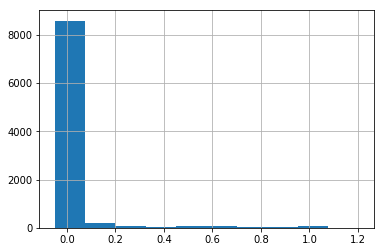

In [21]:
e3_fit= pd.read_csv('./data/parE3_scores.csv')
e3_fit['fit'].hist()
e3_fit

q: what does the epistasis in this space look like?

In [285]:
e3_fit['hamming'] = e3_fit.apply(lambda r: hamming(r['seq'],'LWDK'), axis=1)
print('# hamming =4: ',e3_fit.loc[e3_fit['hamming'] == 4].shape)
print('# hamming =3: ',e3_fit.loc[e3_fit['hamming'] == 3].shape)
print('# hamming =2: ', e3_fit.loc[e3_fit['hamming'] == 2].shape)
print('# hamming =1: ', e3_fit.loc[e3_fit['hamming'] == 1].shape)



# hamming =4:  (5940, 7)
# hamming =3:  (2883, 7)
# hamming =2:  (499, 7)
# hamming =1:  (37, 7)


In [286]:
posns = np.array([58, 59, 60, 63]) +103
print(list(map(str,posns)))



['161', '162', '163', '166']


In [287]:
hamming2_fits = e3_fit.loc[e3_fit['hamming'] == 2]

def makeMutantList(mutSeq):
    # expect mut sequence lik ALDK, and returns L162A,W163L
    
    len_to_add=104
    posns = list(map(str,np.array([58, 59, 60, 63])+len_to_add))
    wt_seq= [x1+x2 for x1, x2 in zip(['L', 'W', 'D', 'K'],posns)]

    charPair = list(zip('LWDK', mutSeq))
    
    #dic_mut should contain the position number and the mutation
    dic_mut = {}
    for i in range(4):
        if charPair[i][0] != charPair[i][1]:
            dic_mut[i] = charPair[i][1]
    pos_to_mut = list(dic_mut.keys())
    
    key_wt_pos_mut = ','.join([wt_seq[i]+dic_mut[i] for i in pos_to_mut])
    return key_wt_pos_mut

#append the single muts to these columns
def getSinglesFromDouble(mutSeq):
    #takes double mut seq ALDK, compares to wt seq LWDK, and returns the individual single mutants it consists of:
    # such as AWDK and LLDK.
    # also return the mutant sequence, like L58A, 
    assert hamming(mutSeq, 'LWDK') == 2
    
    len_to_add=104
    posns = list(map(str,np.array([58, 59, 60, 63])+len_to_add))
    wt_seq= [x1+x2 for x1, x2 in zip(['L', 'W', 'D', 'K'],posns)]
    
    mut1=''
    mut2=''
    
    charPair = list(zip('LWDK', mutSeq))
    
    #dic_mut should contain the position number and the mutation
    dic_mut = {}
    for i in range(4):
        if charPair[i][0] != charPair[i][1]:
            dic_mut[i] = charPair[i][1]
    
    #iterate through the mutations and construct the single mutant string.
    pos_to_mut = list(dic_mut.keys())
    
    key_wt_pos_mut = ','.join([wt_seq[i]+dic_mut[i] for i in pos_to_mut])
        
    mut1 = list('LWDK')
    mut1[pos_to_mut[0]] = dic_mut[pos_to_mut[0]]
    
    mut2 = list('LWDK')
    mut2[pos_to_mut[1]] = dic_mut[pos_to_mut[1]]

    return ''.join(mut1), ''.join(mut2), key_wt_pos_mut

print(getSinglesFromDouble('ALDK'))
print(makeMutantList('ALIW'))


('AWDK', 'LLDK', 'L162A,W163L')
L162A,W163L,D164I,K167W


In [288]:
hamming2_fits['single1'] = hamming2_fits.apply(lambda r: getSinglesFromDouble(r['seq'])[0], axis=1)
hamming2_fits['single2'] = hamming2_fits.apply(lambda r: getSinglesFromDouble(r['seq'])[1], axis=1)
hamming2_fits['double_mutant'] = hamming2_fits.apply(lambda r: getSinglesFromDouble(r['seq'])[2], axis=1)
hamming2_fits['single_mutant_1'] = hamming2_fits.apply(lambda r: getSinglesFromDouble(r['seq'])[2].split(',')[0], axis=1)
hamming2_fits['single_mutant_2'] = hamming2_fits.apply(lambda r: getSinglesFromDouble(r['seq'])[2].split(',')[1], axis=1)


/Users/davidd/anaconda/envs/evcouplings_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/davidd/anaconda/envs/evcouplings_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/davidd/anaconda/envs/evcouplings_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [297]:
hamming2_fits.head()

,seq,conservation,inter,intra,fit,hamming,mutant,single1,single2,double_mutant,single_mutant_1,single_mutant_2
18,ALDK,-235.510794,-37.063229,-79.682331,0.044179,2,"L162A,W163L",AWDK,LLDK,"L162A,W163L",L162A,W163L
148,AIDK,-234.571477,-36.775794,-81.071975,0.030531,2,"L162A,W163I",AWDK,LIDK,"L162A,W163I",L162A,W163I
278,AVDK,-235.228592,-38.444313,-80.567731,0.026256,2,"L162A,W163V",AWDK,LVDK,"L162A,W163V",L162A,W163V
408,AADK,-234.641096,-39.004253,-78.485092,0.009797,2,"L162A,W163A",AWDK,LADK,"L162A,W163A",L162A,W163A
528,AWAK,-234.545911,-39.474107,-79.818912,1.013920,2,"L162A,D164A",AWDK,LWAK,"L162A,D164A",L162A,D164A


In [298]:
merge1 =pd.merge(hamming2_fits, e3_fit, left_on='single1', right_on='seq', how='left', suffixes = ('_double', '_s1'))
df_doubles_singles = pd.merge(merge1, e3_fit, left_on='single2', right_on='seq', how='left', suffixes=('','_s2'))


In [299]:
#make the multiplicative column of the single fits
df_doubles_singles['multi_single_fits'] = df_doubles_singles.apply(lambda r: r['fit_s1']* r['fit'], axis=1)
df_doubles_singles['measured_epistasis_multi'] = df_doubles_singles['fit_double']/df_doubles_singles['multi_single_fits']

In [300]:
#make additive columns of single fits
df_doubles_singles['add_single_fits'] = df_doubles_singles.apply(lambda r: r['fit_s1']+ r['fit'], axis=1)
df_doubles_singles['measured_epistasis_add'] = df_doubles_singles['fit_double']-df_doubles_singles['add_single_fits']

In [301]:
df_doubles_singles

,seq_double,conservation_double,inter_double,intra_double,fit_double,hamming_double,mutant_double,single1,single2,double_mutant,...,conservation,inter,intra,fit,hamming,mutant,multi_single_fits,measured_epistasis_multi,add_single_fits,measured_epistasis_add
0,ALDK,-235.510794,-37.063229,-79.682331,0.044179,2,"L162A,W163L",AWDK,LLDK,"L162A,W163L",...,-234.731410,-37.717245,-79.681776,0.300827,1,W163L,0.314788,0.140345,1.347234,-1.303055
1,AIDK,-234.571477,-36.775794,-81.071975,0.030531,2,"L162A,W163I",AWDK,LIDK,"L162A,W163I",...,-233.792093,-37.429810,-81.071420,0.265450,1,W163I,0.277769,0.109915,1.311857,-1.281326
2,AVDK,-235.228592,-38.444313,-80.567731,0.026256,2,"L162A,W163V",AWDK,LVDK,"L162A,W163V",...,-234.449208,-39.098329,-80.567176,0.254576,1,W163V,0.266390,0.098562,1.300983,-1.274727
3,AADK,-234.641096,-39.004253,-78.485092,0.009797,2,"L162A,W163A",AWDK,LADK,"L162A,W163A",...,-233.861712,-39.658269,-78.484537,0.029715,1,W163A,0.031094,0.315082,1.076122,-1.066324
4,AWAK,-234.545911,-39.474107,-79.818912,1.013920,2,"L162A,D164A",AWDK,LWAK,"L162A,D164A",...,-233.766527,-40.128123,-79.818357,0.979132,1,D164A,1.024570,0.989605,2.025538,-1.011619
5,AWDL,-235.400666,-38.304301,-81.524820,1.054724,2,"L162A,K167L",AWDK,LWDL,"L162A,K167L",...,-234.621282,-38.958317,-81.524265,1.080144,1,K167L,1.130270,0.933161,2.126551,-1.071827
6,AWDE,-234.734142,-37.876668,-80.712249,0.674110,2,"L162A,K167E",AWDK,LWDE,"L162A,K167E",...,-233.954758,-38.530684,-80.711694,0.892977,1,K167E,0.934417,0.721424,1.939383,-1.265273
7,AWDI,-234.790895,-38.028746,-81.061949,1.152256,2,"L162A,K167I",AWDK,LWDI,"L162A,K167I",...,-234.011511,-38.682762,-81.061394,1.113402,1,K167I,1.165071,0.989001,2.159809,-1.007552
8,AWDA,-234.519426,-38.847270,-80.593368,1.015040,2,"L162A,K167A",AWDK,LWDA,"L162A,K167A",...,-233.740042,-39.501286,-80.592813,1.122629,1,K167A,1.174727,0.864065,2.169036,-1.153996
9,AWDV,-234.635649,-38.272882,-81.568270,1.064090,2,"L162A,K167V",AWDK,LWDV,"L162A,K167V",...,-233.856265,-38.926898,-81.567715,0.825655,1,K167V,0.863971,1.231627,1.872062,-0.807971


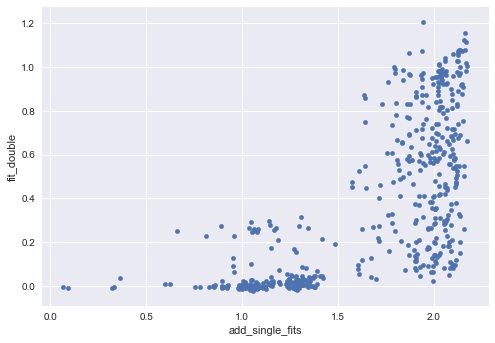

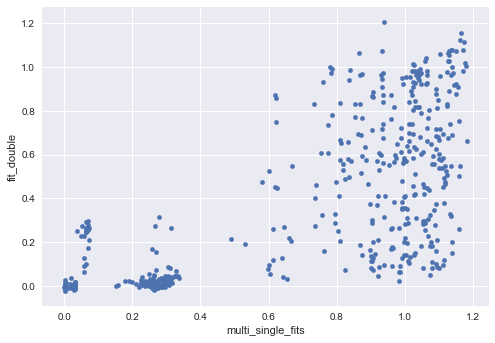

In [293]:
#show how much epistasis there is between the singles and doubles.
#everything looks very epistatic in either view. 
df_doubles_singles.plot.scatter(x='add_single_fits', y='fit_double')
df_doubles_singles.plot.scatter(x='multi_single_fits', y='fit_double')


Q: is there any correlation between the predicted epistasis and the measured epistasis?
    

In [252]:
#this is how the mutations need to be indexed
print(list(zip(c.target_seq,c.index_list)))

[('R', 4), ('L', 5), ('V', 6), ('W', 7), ('S', 8), ('P', 9), ('T', 10), ('A', 11), ('K', 12), ('A', 13), ('D', 14), ('L', 15), ('I', 16), ('D', 17), ('I', 18), ('Y', 19), ('V', 20), ('M', 21), ('I', 22), ('G', 23), ('S', 24), ('E', 25), ('N', 26), ('I', 27), ('R', 28), ('A', 29), ('A', 30), ('D', 31), ('R', 32), ('Y', 33), ('Y', 34), ('D', 35), ('Q', 36), ('L', 37), ('E', 38), ('A', 39), ('R', 40), ('A', 41), ('L', 42), ('Q', 43), ('L', 44), ('A', 45), ('D', 46), ('Q', 47), ('P', 48), ('R', 49), ('M', 50), ('G', 51), ('V', 52), ('R', 53), ('R', 54), ('P', 55), ('D', 56), ('I', 57), ('R', 58), ('P', 59), ('S', 60), ('A', 61), ('R', 62), ('M', 63), ('L', 64), ('V', 65), ('E', 66), ('A', 67), ('P', 68), ('F', 69), ('V', 70), ('L', 71), ('L', 72), ('Y', 73), ('E', 74), ('T', 75), ('V', 76), ('P', 77), ('D', 78), ('W', 86), ('V', 87), ('E', 88), ('I', 89), ('V', 90), ('R', 91), ('V', 92), ('V', 93), ('D', 94), ('G', 95), ('R', 96), ('R', 97), ('D', 98), ('L', 99), ('N', 100), ('E', 108), ('

In [302]:
#this is using the delta_hamiltonian.
data_pred_doubles  = tools.predict_mutation_table(
    c, df_doubles_singles,mutant_column='double_mutant',output_column='effect_predict_epi_double'
)
data_pred_doubles  = tools.predict_mutation_table(
    c, data_pred_doubles,mutant_column='single_mutant_1',output_column='effect_predict_epi_single1'
)
data_pred_doubles  = tools.predict_mutation_table(
    c, data_pred_doubles,mutant_column='single_mutant_2',output_column='effect_predict_epi_single2'
)

In [303]:
data_pred_doubles['pred_epi_multi'] = data_pred_doubles['effect_predict_epi_double']/data_pred_doubles['effect_predict_epi_single1'] * data_pred_doubles['effect_predict_epi_single2']
data_pred_doubles['pred_epi_add'] = data_pred_doubles['effect_predict_epi_double'] -(data_pred_doubles['effect_predict_epi_single1'] + data_pred_doubles['effect_predict_epi_single2'])


In [304]:
data_pred_doubles.columns.values

array(['seq_double', 'conservation_double', 'inter_double', 'intra_double',
       'fit_double', 'hamming_double', 'mutant_double', 'single1',
       'single2', 'double_mutant', 'single_mutant_1', 'single_mutant_2',
       'seq_s1', 'conservation_s1', 'inter_s1', 'intra_s1', 'fit_s1',
       'hamming_s1', 'mutant_s1', 'seq', 'conservation', 'inter', 'intra',
       'fit', 'hamming', 'mutant', 'multi_single_fits',
       'measured_epistasis_multi', 'add_single_fits',
       'measured_epistasis_add', 'effect_predict_epi_double',
       'effect_predict_epi_single1', 'effect_predict_epi_single2',
       'pred_epi_multi', 'pred_epi_add'], dtype=object)

SpearmanrResult(correlation=0.27570331023492767, pvalue=3.7251520174371595e-10)
(0.24348948804039861, 3.61652832041638e-08)


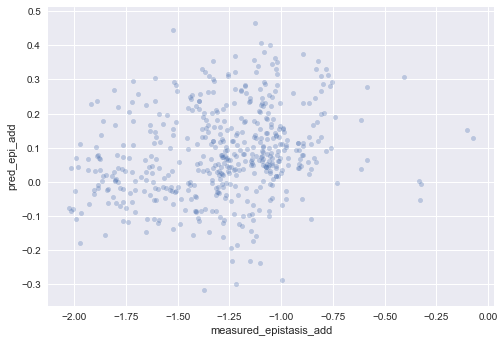

In [312]:
data_pred_doubles.plot.scatter(x='measured_epistasis_add', y='pred_epi_add', alpha=0.3)
print(stats.spearmanr(data_pred_doubles['measured_epistasis_add'], data_pred_doubles['pred_epi_add']))
print(stats.pearsonr(data_pred_doubles['measured_epistasis_add'], data_pred_doubles['pred_epi_add']))

SpearmanrResult(correlation=0.0090783011806746007, pvalue=0.83969043273641275)

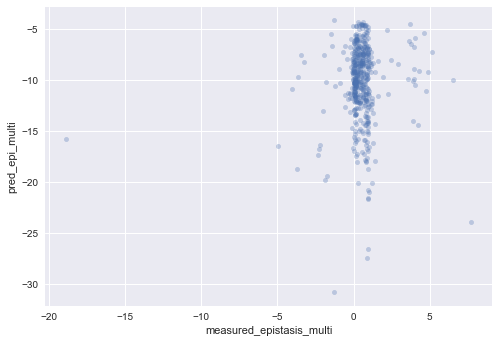

In [310]:
data_pred_doubles.plot.scatter(x='measured_epistasis_multi', y='pred_epi_multi', alpha=0.3)
stats.spearmanr(data_pred_doubles['measured_epistasis_multi'], data_pred_doubles['pred_epi_multi'])

SpearmanrResult(correlation=-0.13130550257140786, pvalue=0.0032978446192193384)

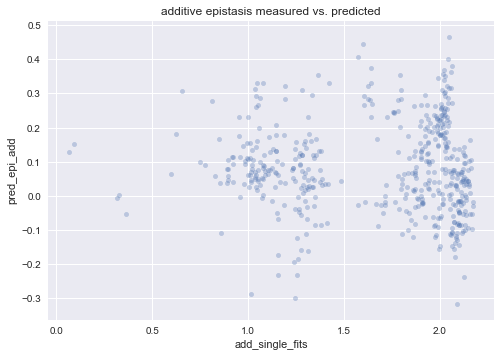

In [279]:
#plotting the epistasis predicted, versus the epistasis measured.
data_pred_doubles.plot.scatter(x='add_single_fits', y='pred_epi_add', alpha=0.3)
plt.title('additive epistasis measured vs. predicted')
stats.spearmanr(data_pred_doubles['add_single_fits'], data_pred_doubles['pred_epi_add'])

SpearmanrResult(correlation=-0.34372986937730882, pvalue=2.7644981947279998e-15)

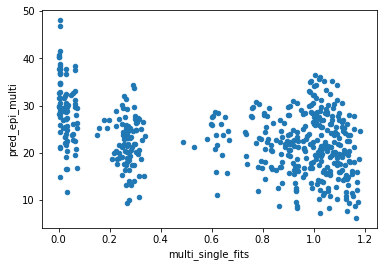

In [216]:
data_pred_doubles.plot.scatter(x='multi_single_fits', y='pred_epi_multi')
stats.spearmanr(data_pred_doubles['multi_single_fits'], data_pred_doubles['pred_epi_multi'])

In [ ]:
#can the mutant values be predicted well of all data.

In [211]:
#what are the total predictions like again?
e3_fit['mutant'] = e3_fit.apply(lambda r: makeMutantList(r['seq']), axis=1)

In [270]:
data_pred_e3  = tools.predict_mutation_table(
    c, e3_fit,mutant_column='mutant',output_column='effect_predict_epi'
)

data_pred_e3_evalue1  = tools.predict_mutation_table(
    c_e1, e3_fit,mutant_column='mutant',output_column='effect_predict_epi'
)

data_pred_e3_old  = tools.predict_mutation_table(
    c_old, e3_fit,mutant_column='mutant',output_column='effect_predict_epi'
)


SpearmanrResult(correlation=0.43862727557546333, pvalue=masked_array(data = 0.0,
             mask = False,
       fill_value = 1e+20)
)
SpearmanrResult(correlation=0.43695169592350691, pvalue=masked_array(data = 0.0,
             mask = False,
       fill_value = 1e+20)
)
SpearmanrResult(correlation=0.42453326046966322, pvalue=masked_array(data = 0.0,
             mask = False,
       fill_value = 1e+20)
)


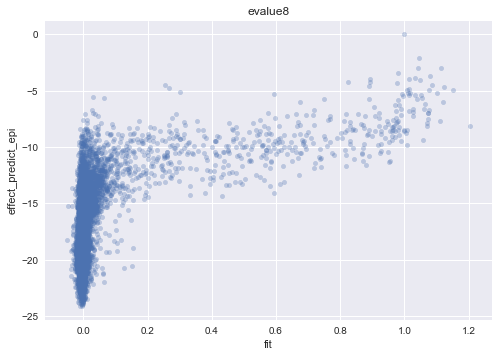

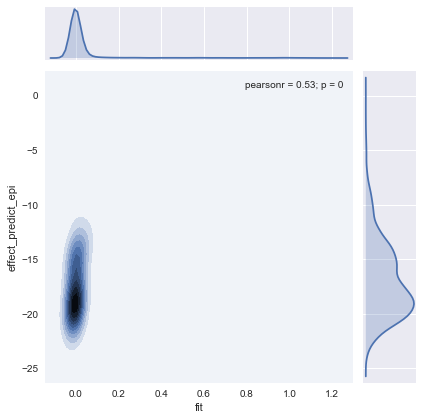

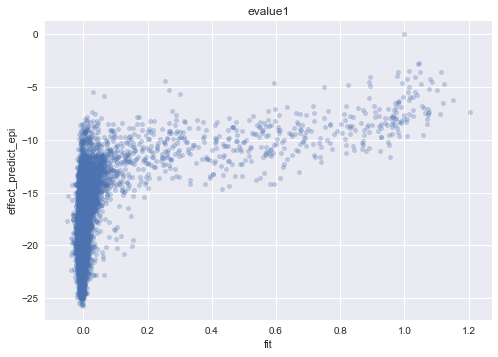

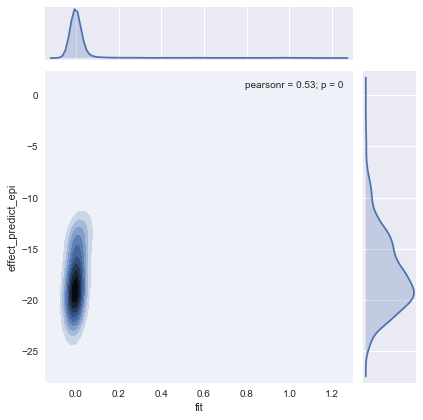

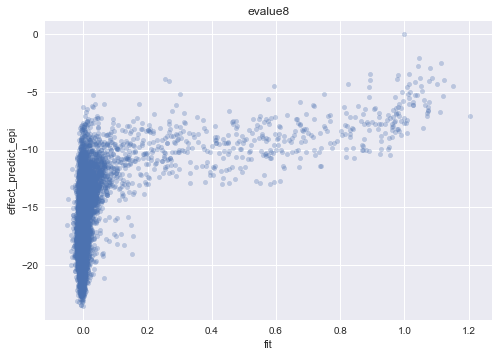

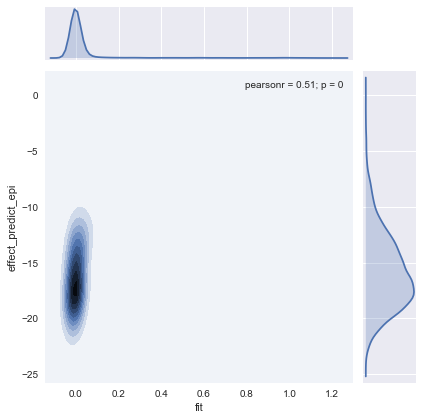

In [272]:
#correlation of all the data vs. 3 couplingsmodels that could be used.

data_pred_e3.plot.scatter(x='fit', y='effect_predict_epi', alpha=0.3)
plt.title('evalue8')
sns.jointplot(x=data_pred_e3["fit"], y=data_pred_e3['effect_predict_epi'], kind='kde')
print(stats.spearmanr(data_pred_e3['fit'], data_pred_e3['effect_predict_epi'], nan_policy='omit'))

data_pred_e3_evalue1.plot.scatter(x='fit', y='effect_predict_epi', alpha=0.3)
plt.title('evalue1')
sns.jointplot(x=data_pred_e3_evalue1["fit"], y=data_pred_e3_evalue1['effect_predict_epi'], kind='kde')
print(stats.spearmanr(data_pred_e3_evalue1['fit'], data_pred_e3_evalue1['effect_predict_epi'], nan_policy='omit'))

data_pred_e3_old.plot.scatter(x='fit', y='effect_predict_epi', alpha=0.3)
plt.title('evalue8')
sns.jointplot(x=data_pred_e3_old["fit"], y=data_pred_e3_old['effect_predict_epi'], kind='kde')
print(stats.spearmanr(data_pred_e3_old['fit'], data_pred_e3_old['effect_predict_epi'], nan_policy='omit'))


/Users/davidd/anaconda/envs/evcouplings_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


SpearmanrResult(correlation=0.39473684210526316, pvalue=0.015615769681383387)


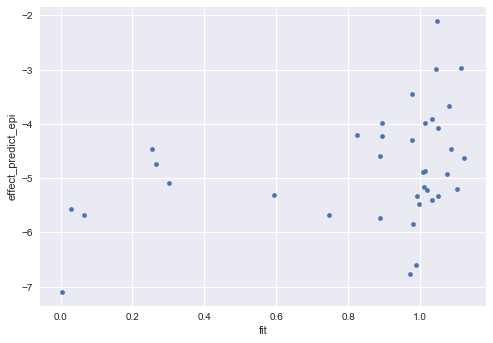

In [265]:
#predictions for single mutants
e3_fit_singles = e3_fit.loc[e3_fit['hamming'] == 1]
e3_fit_singles['mutant'] = e3_fit_singles.apply(lambda r: makeMutantList(r['seq']), axis=1)

data_pred_singles = tools.predict_mutation_table(
    c, e3_fit_singles,mutant_column='mutant',output_column='effect_predict_epi'
)
data_pred_singles.plot.scatter(x='fit', y='effect_predict_epi')
print(stats.spearmanr(data_pred_singles['fit'], data_pred_singles['effect_predict_epi'], nan_policy='omit'))


SpearmanrResult(correlation=0.45009121858174178, pvalue=2.9231237546557066e-26)


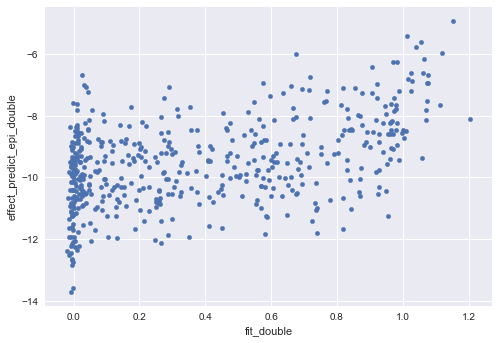

In [260]:
#predictions for double mutants
data_pred_doubles.plot.scatter(x='fit_double', y='effect_predict_epi_double')
print(stats.spearmanr(data_pred_doubles['fit_double'], data_pred_doubles['effect_predict_epi_double'], nan_policy='omit'))


In [258]:
data_pred_doubles

,seq_double,conservation_double,inter_double,intra_double,fit_double,hamming_double,single1,single2,double_mutant,single_mutant_1,...,intra,fit,hamming,multi_single_fits,add_single_fits,effect_predict_epi_double,effect_predict_epi_single1,effect_predict_epi_single2,pred_epi_multi,pred_epi_add
0,ALDK,-235.510794,-37.063229,-79.682331,0.044179,2,AWDK,LLDK,"L162A,W163L",L162A,...,-79.681776,0.300827,1,0.314788,1.347234,-7.215768,-2.099743,-5.087333,10.682095,-7.187077
1,AIDK,-234.571477,-36.775794,-81.071975,0.030531,2,AWDK,LIDK,"L162A,W163I",L162A,...,-81.071420,0.265450,1,0.277769,1.311857,-7.001236,-2.099743,-4.740509,9.953854,-6.840253
2,AVDK,-235.228592,-38.444313,-80.567731,0.026256,2,AWDK,LVDK,"L162A,W163V",L162A,...,-80.567176,0.254576,1,0.266390,1.300983,-6.665644,-2.099743,-4.455800,9.356036,-6.555543
3,AADK,-234.641096,-39.004253,-78.485092,0.009797,2,AWDK,LADK,"L162A,W163A",L162A,...,-78.484537,0.029715,1,0.031094,1.076122,-7.608694,-2.099743,-5.560310,11.675225,-7.660054
4,AWAK,-234.545911,-39.474107,-79.818912,1.013920,2,AWDK,LWAK,"L162A,D164A",L162A,...,-79.818357,0.979132,1,1.024570,2.025538,-5.415005,-2.099743,-3.448126,7.240179,-5.547869
5,AWDL,-235.400666,-38.304301,-81.524820,1.054724,2,AWDK,LWDL,"L162A,K167L",L162A,...,-81.524265,1.080144,1,1.130270,2.126551,-5.619988,-2.099743,-3.663939,7.693332,-5.763682
6,AWDE,-234.734142,-37.876668,-80.712249,0.674110,2,AWDK,LWDE,"L162A,K167E",L162A,...,-80.711694,0.892977,1,0.934417,1.939383,-5.981700,-2.099743,-3.982984,8.363245,-6.082728
7,AWDI,-234.790895,-38.028746,-81.061949,1.152256,2,AWDK,LWDI,"L162A,K167I",L162A,...,-81.061394,1.113402,1,1.165071,2.159809,-4.913545,-2.099743,-2.977537,6.252064,-5.077280
8,AWDA,-234.519426,-38.847270,-80.593368,1.015040,2,AWDK,LWDA,"L162A,K167A",L162A,...,-80.592813,1.122629,1,1.174727,2.169036,-6.819756,-2.099743,-4.621709,9.704402,-6.721452
9,AWDV,-234.635649,-38.272882,-81.568270,1.064090,2,AWDK,LWDV,"L162A,K167V",L162A,...,-81.567715,0.825655,1,0.863971,1.872062,-6.164847,-2.099743,-4.196840,8.812287,-6.296583


In [327]:
# predict the best suppressor for each mutant that I've used.
from tools import extract_mutations
from constants import AA_LIST_ALPHABETICAL

In [388]:
#mutants generated:
mut_key_at = 'W59T'

def find_max_rescue_evh(mut_key_at):
    off_set_at= 104

    mut_key_at_offset = mut_key_at[0]+str(off_set + int(mut_key_at[1:-1]))+mut_key_at[-1]

    len_toxin = 103



    # take all amino acid mutations
    AA_LIST = AA_LIST_ALPHABETICAL[:-2]
    assert len(AA_LIST) == 20

    res = []

    for wt_aa, pos in zip(c.target_seq,c.index_list):
        if pos < 103:
            for mut_aa in AA_LIST_ALPHABETICAL[:-2]:
                if mut_aa != wt_aa:
                    mut_aa_key = wt_aa + str(pos) + mut_aa

                    full_mut_key = mut_aa_key +','+ mut_key_at_offset


                    preds = c.delta_hamiltonian(extract_mutations(full_mut_key))

                    res.append(
                        {
                        'mutant1':full_mut_key.split(',')[0],
                        'mutant2':full_mut_key.split(',')[1],
                        'freq': c.fi(pos, mut_aa),
                        'pred_full': preds[0],
                        'pred_couplings': preds[1],
                        'pred_fields': preds[2]
                        }
                    )

    df_preds = pd.DataFrame(res)
    df_preds = df_preds.sort_values(by='pred_full', ascending=False)
    df_preds.to_csv('./out/'+mut_key_at+'_rescue_sort_list.csv')
    
    #add the rank as a column
    df_preds['rank'] = df_preds.index
    
    max_rescue = df_preds.loc[df_preds['pred_full'].idxmax()].mutant1
    print( mut_key_at,max_rescue)
    
    #    returnmut_key_at, 
    #print('maximally rescuing for',mut_key_at,'\n',df_preds.loc[df_preds['pred_full'].idxmax()])



In [389]:
list_at_mutants = ['W59T', 'G62L', 'F73K', 'A80R', 'K63D', 'E79H', 'A16K']
for at_mut_key in list_at_mutants:
    find_max_rescue_evh(at_mut_key)

W59T T10A
G62L M21T
F73K M21T
A80R T10A
K63D T10A
E79H T10A
A16K T10A


In [390]:
# check: are the single T mutants also the highest, irrespective of the AT single mutants?

#these lists look exactly the same with or without those mutations.


len_toxin = 103

# take all amino acid mutations
AA_LIST = AA_LIST_ALPHABETICAL[:-2]
assert len(AA_LIST) == 20

res = []

for wt_aa, pos in zip(c.target_seq,c.index_list):
    if pos < 103:
        for mut_aa in AA_LIST_ALPHABETICAL[:-2]:
            if mut_aa != wt_aa:
                mut_aa_key = wt_aa + str(pos) + mut_aa

                preds = c.delta_hamiltonian(extract_mutations(mut_aa_key))

                res.append(
                    {
                    'mutant1':mut_aa_key,
                    'freq': c.fi(pos, mut_aa),
                    'pred_full': preds[0],
                    'pred_couplings': preds[1],
                    'pred_fields': preds[2]
                    }
                )

df_preds = pd.DataFrame(res)
df_preds = df_preds.sort_values(by='pred_full', ascending=False)
df_preds.to_csv('./out/'+'toxin_single_sorted.csv')



In [350]:
#plot the correlation of the rank of the mutations that rescue to make the case that most 
#rescues are independent of the initial mutation


# check: the main contribution of the positive full hamiltonien driven by the positive value of the fields, rather than the ?

full           -4.89691
couplings      -5.62975
fields         0.732837
mutant       T10A,W163T
Name: T10A,W163T, dtype: object
